In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
10,349 cases (7 day average) as of Wed 23 Jun, +741.9 since Tue 22 Jun
196 hospitalised (7 day average) as of Sat 26 Jun, +8.3 since Wed 23 Jun
11 died (7 day average) as of Wed 23 Jun, -0.7 since Tue 22 Jun


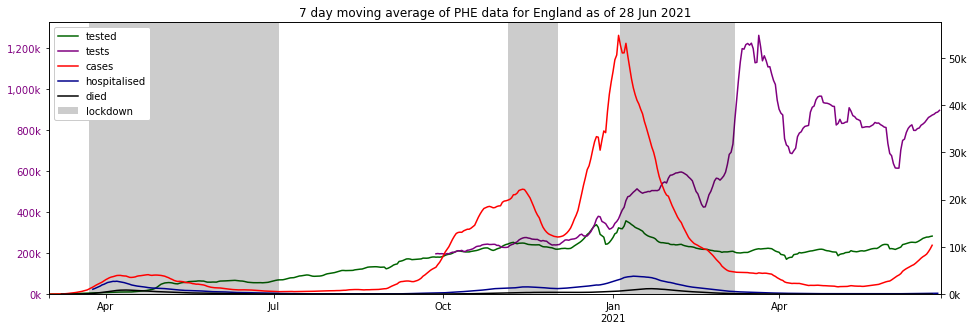

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

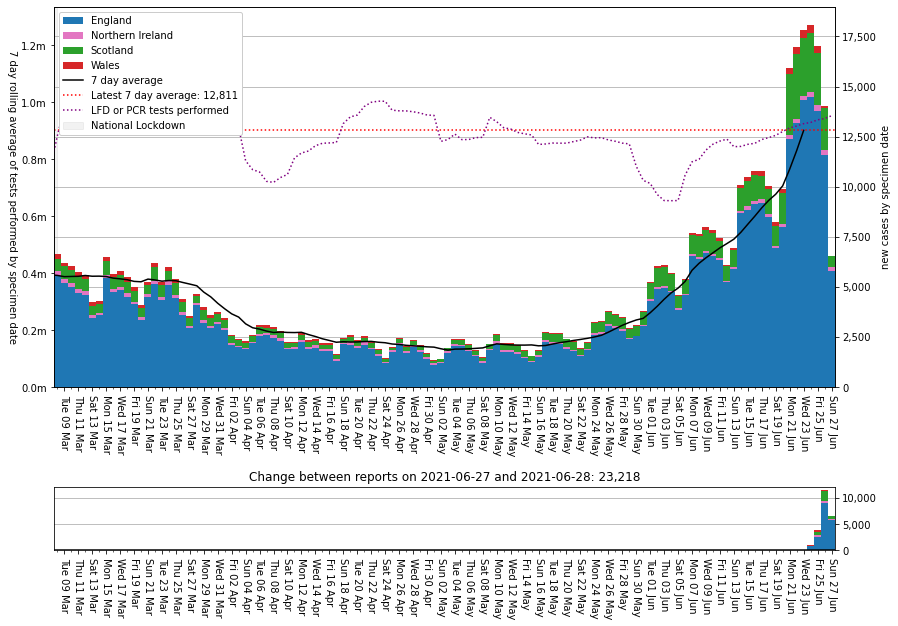

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

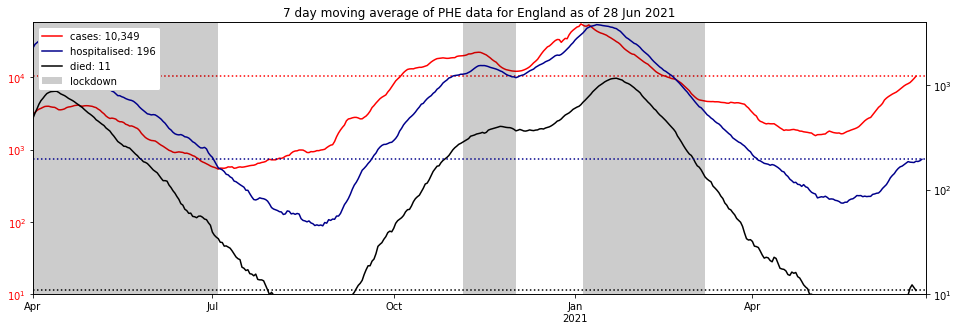

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

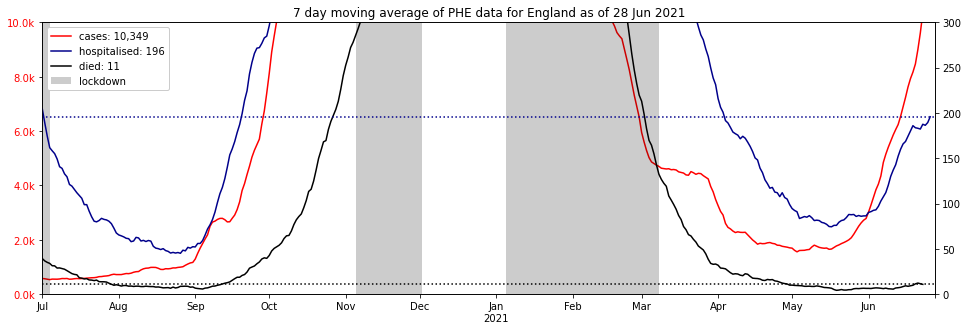

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=10_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=300)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,27 Jun 21,"+27,414,725","+37,275,894","+27,414,725","+97,993","+118,366","+97,993"
Northern Ireland,27 Jun 21,"+850,004","+1,160,024","+850,004","+4,378","+2,533","+4,378"
Scotland,27 Jun 21,"+2,691,775","+3,765,379","+2,691,775","+12,418","+17,869","+12,418"
Wales,27 Jun 21,"+1,627,242","+2,253,214","+1,627,242","+8,766",+944,"+8,766"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,27414725.0,37275894.0,9861169.0,56286961,48.705285,17.519455,33.775259
1,Northern Ireland,N92000002,850004.0,1160024.0,310020.0,1893667,44.886667,16.371411,38.741922
2,Scotland,S92000003,2691775.0,3765379.0,1073604.0,5463300,49.270130,19.651200,31.078670
3,Wales,W92000004,1627242.0,2253214.0,625972.0,3152879,51.611305,19.853981,28.534714


'partial: 44,454,511 (66.6%), full: 32,583,746'

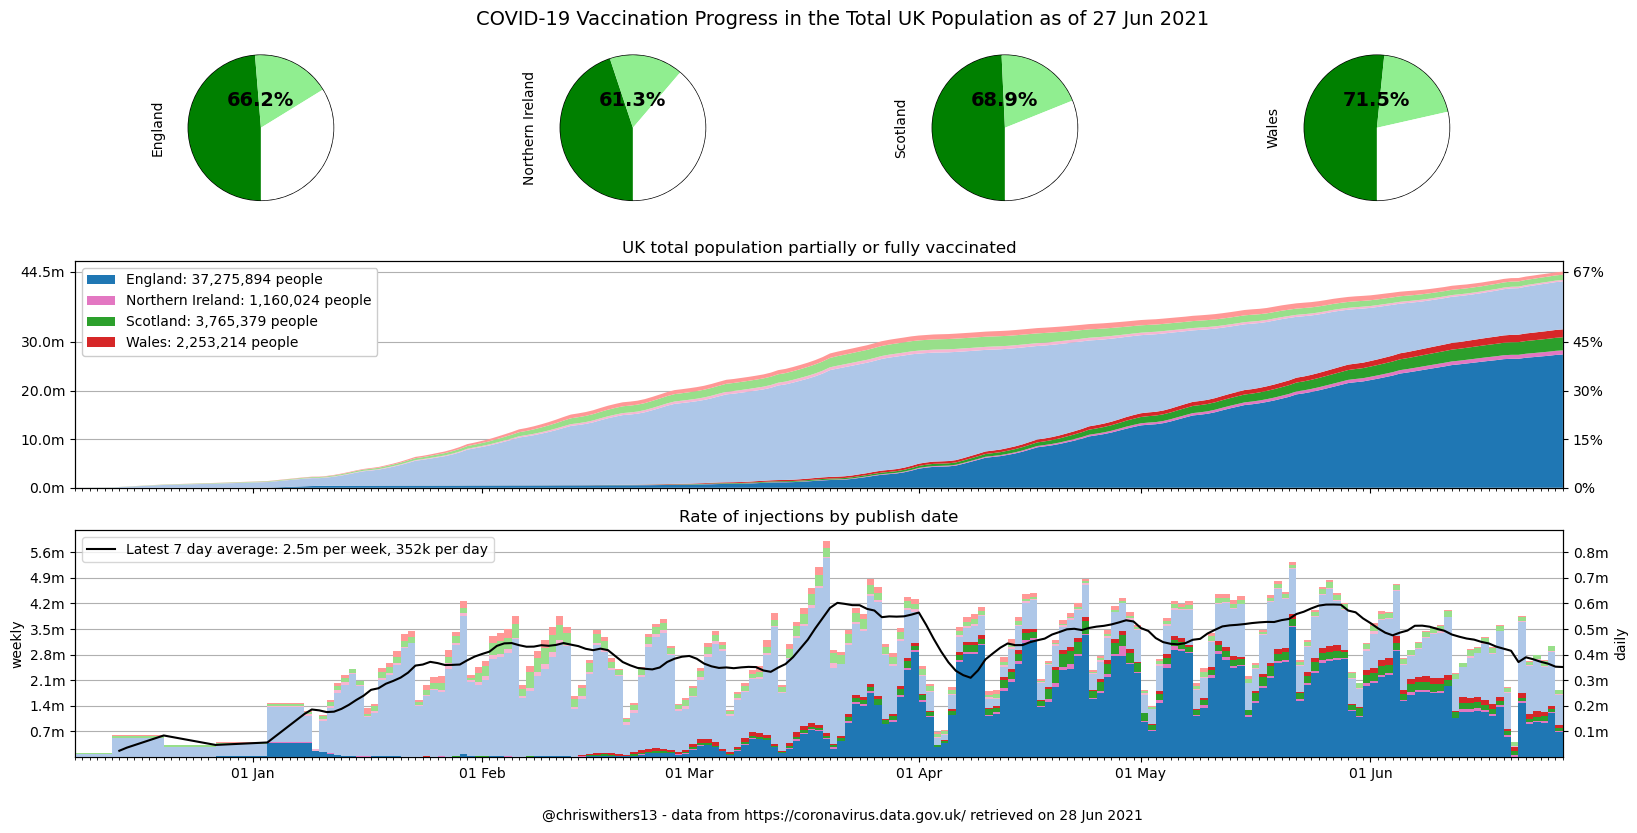

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

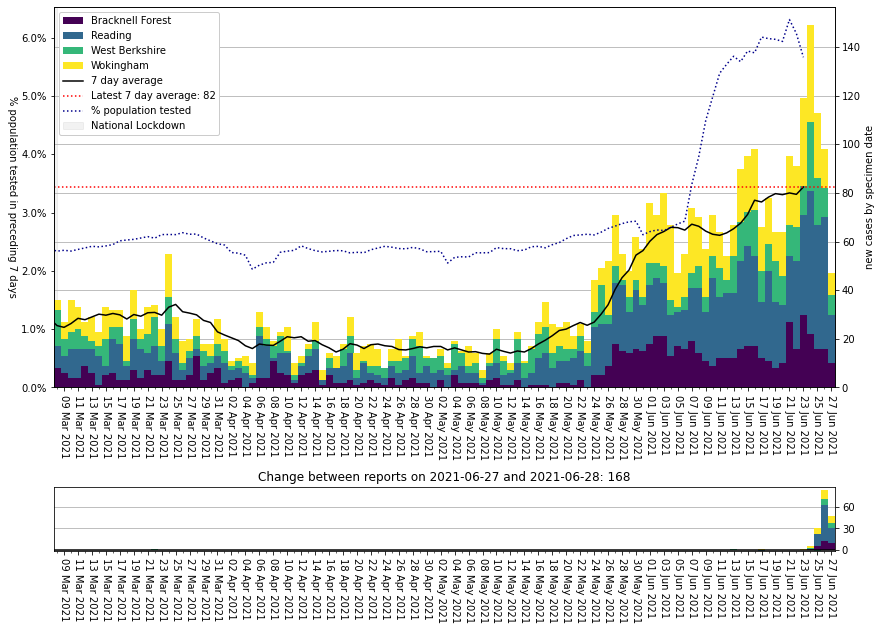

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

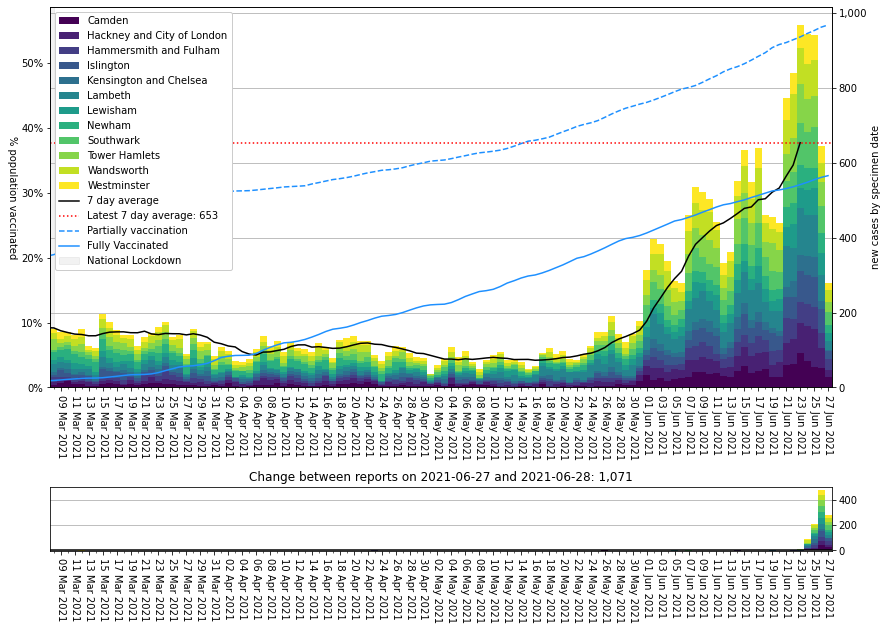

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000042,Dundee City,687.784624,1027.0,2021-06-27
S12000010,East Lothian,589.224017,631.0,2021-06-27
S12000019,Midlothian,564.568462,522.0,2021-06-27
E07000120,Hyndburn,545.389485,442.0,2021-06-27
S12000036,City of Edinburgh,516.259311,2710.0,2021-06-27
E08000021,Newcastle upon Tyne,457.037184,1384.0,2021-06-27
E07000125,Rossendale,446.266193,319.0,2021-06-27
E06000008,Blackburn with Darwen,446.237708,668.0,2021-06-27
E08000003,Manchester,426.691845,2359.0,2021-06-27


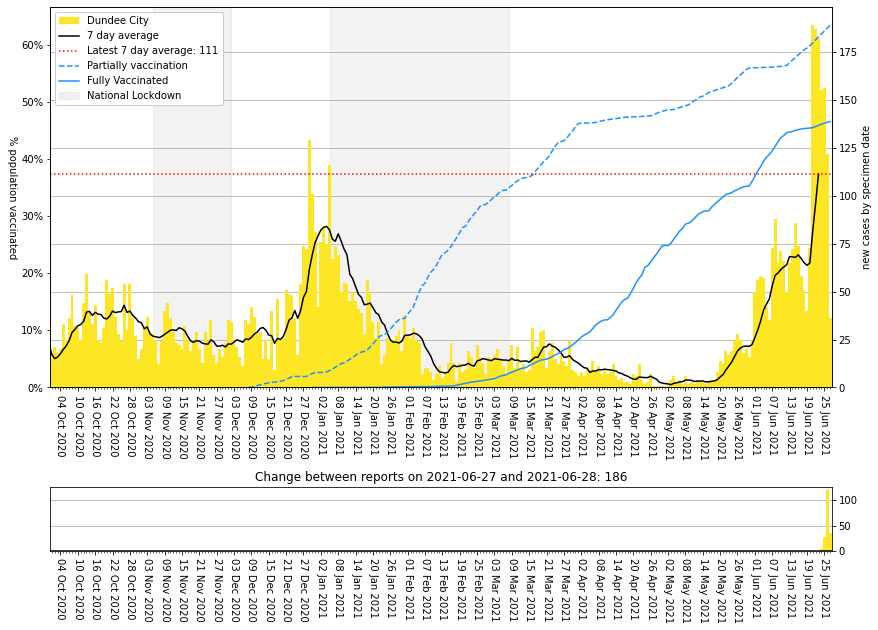

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000036,City of Edinburgh,516.259311,2710.0,2021-06-27
E08000035,Leeds,312.051229,2475.0,2021-06-27
E08000003,Manchester,426.691845,2359.0,2021-06-27
E08000025,Birmingham,190.048134,2170.0,2021-06-27
S12000049,Glasgow City,329.795299,2088.0,2021-06-27
E06000047,County Durham,383.894177,2035.0,2021-06-27
E08000012,Liverpool,335.313086,1670.0,2021-06-27
E08000021,Newcastle upon Tyne,457.037184,1384.0,2021-06-27
E08000010,Wigan,397.064461,1305.0,2021-06-27


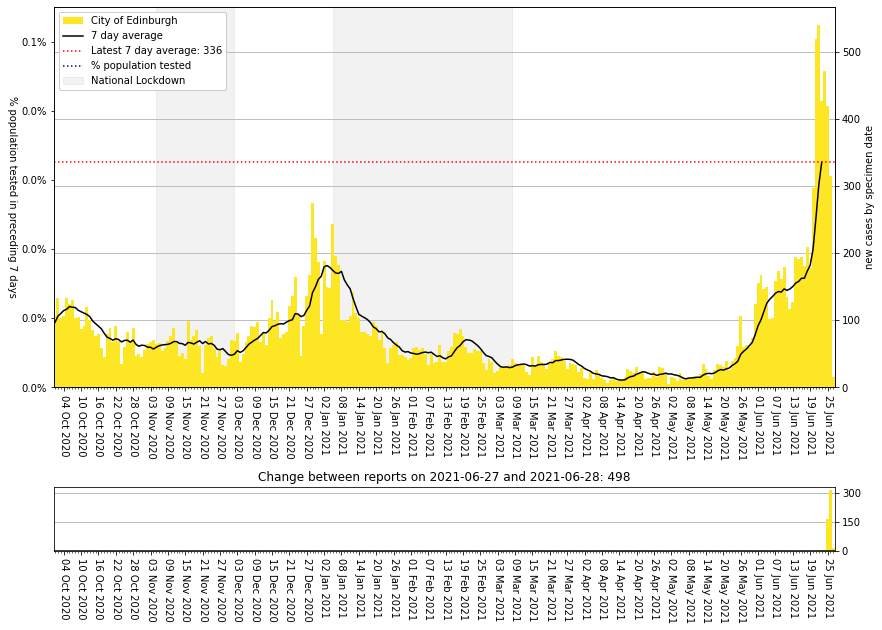

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [19]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.7

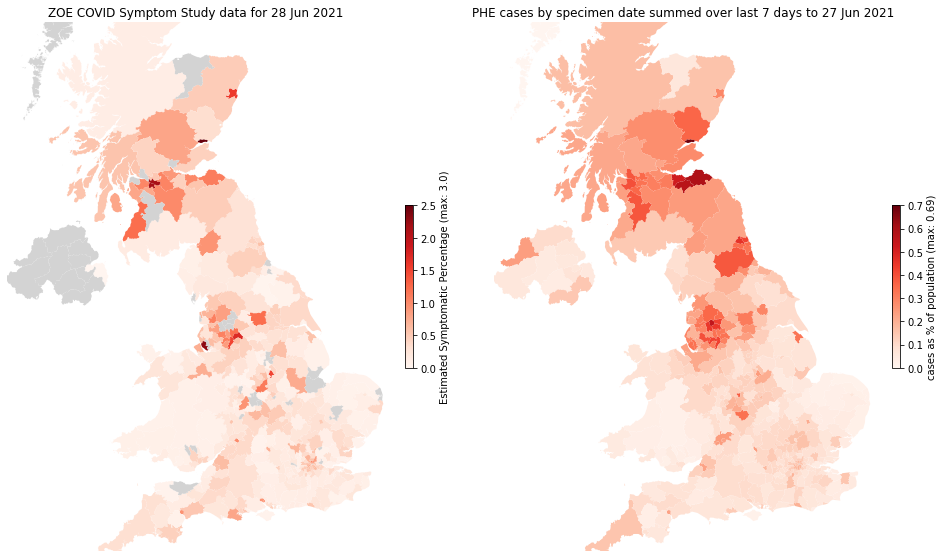

In [20]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [21]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...